### IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
import joblib

In [4]:
df = pd.read_csv(r"D:\6th Semester\ANN\Project\kidney_disease.csv")

In [5]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'target'
}, inplace=True)

In [8]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].str.strip()

In [9]:
df['target'] = df['target'].str.strip()

In [10]:
necessary_columns = [
    'age',
    'specific_gravity',
    'albumin',
    'blood_urea',
    'serum_creatinine',
    'hemoglobin',
    'diabetes_mellitus',
    'hypertension',
    'pus_cell',
    'appetite',
    'target'
]

In [11]:
df = df[necessary_columns]

In [14]:
df

,age,specific_gravity,albumin,blood_urea,serum_creatinine,hemoglobin,diabetes_mellitus,hypertension,pus_cell,appetite,target
0,48.0,1.020,1.0,36.0,1.2,15.4,yes,yes,normal,good,ckd
1,7.0,1.020,4.0,18.0,0.8,11.3,no,no,normal,good,ckd
2,62.0,1.010,2.0,53.0,1.8,9.6,yes,no,normal,poor,ckd
3,48.0,1.005,4.0,56.0,3.8,11.2,no,yes,abnormal,poor,ckd
4,51.0,1.010,2.0,26.0,1.4,11.6,no,no,normal,good,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,1.020,0.0,49.0,0.5,15.7,no,no,normal,good,notckd
396,42.0,1.025,0.0,31.0,1.2,16.5,no,no,normal,good,notckd
397,12.0,1.020,0.0,26.0,0.6,15.8,no,no,normal,good,notckd
398,17.0,1.025,0.0,50.0,1.0,14.2,no,no,normal,good,notckd


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                391 non-null    float64
 1   specific_gravity   353 non-null    float64
 2   albumin            354 non-null    float64
 3   blood_urea         381 non-null    float64
 4   serum_creatinine   383 non-null    float64
 5   hemoglobin         348 non-null    float64
 6   diabetes_mellitus  398 non-null    object 
 7   hypertension       398 non-null    object 
 8   pus_cell           335 non-null    object 
 9   appetite           399 non-null    object 
 10  target             400 non-null    object 
dtypes: float64(6), object(5)
memory usage: 34.5+ KB


In [18]:
df.isnull().sum()

age                   9
specific_gravity     47
albumin              46
blood_urea           19
serum_creatinine     17
hemoglobin           52
diabetes_mellitus     2
hypertension          2
pus_cell             65
appetite              1
target                0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
numerical_cols = [
    'age',
    'specific_gravity',
    'albumin',
    'blood_urea',
    'serum_creatinine',
    'hemoglobin'
]

In [21]:
categorical_cols = [
    'diabetes_mellitus',
    'hypertension',
    'pus_cell',
    'appetite',
]

In [27]:
numerical_imp = SimpleImputer(strategy = 'mean')

In [30]:
categorical_imp = SimpleImputer(strategy = 'most_frequent')

In [31]:
df.loc[:, numerical_cols] = numerical_imp.fit_transform(df[numerical_cols])

In [33]:
df.loc[:, categorical_cols] = categorical_imp.fit_transform(df[categorical_cols])

In [34]:
df.isnull().sum()

age                  0
specific_gravity     0
albumin              0
blood_urea           0
serum_creatinine     0
hemoglobin           0
diabetes_mellitus    0
hypertension         0
pus_cell             0
appetite             0
target               0
dtype: int64

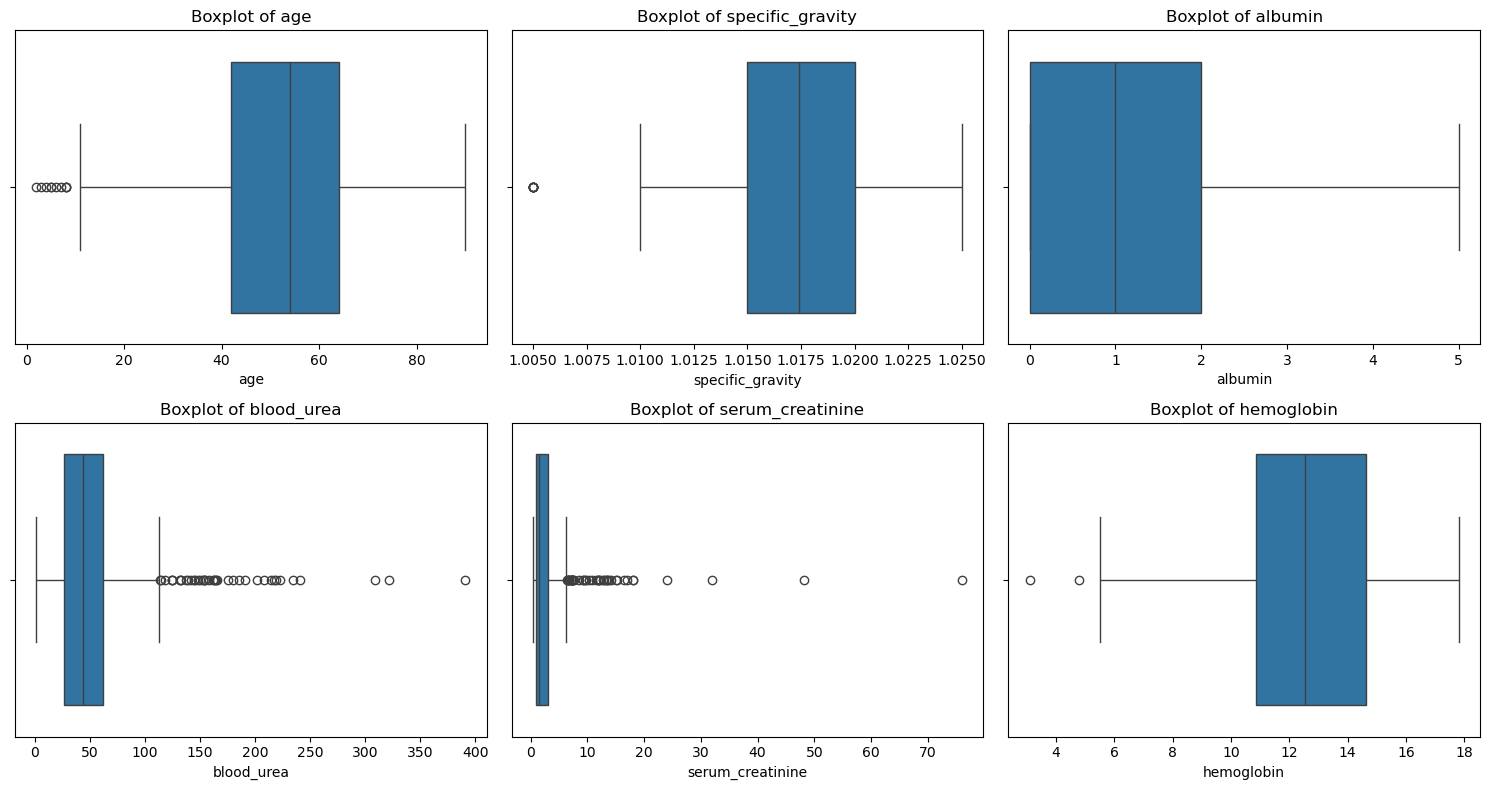

In [35]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

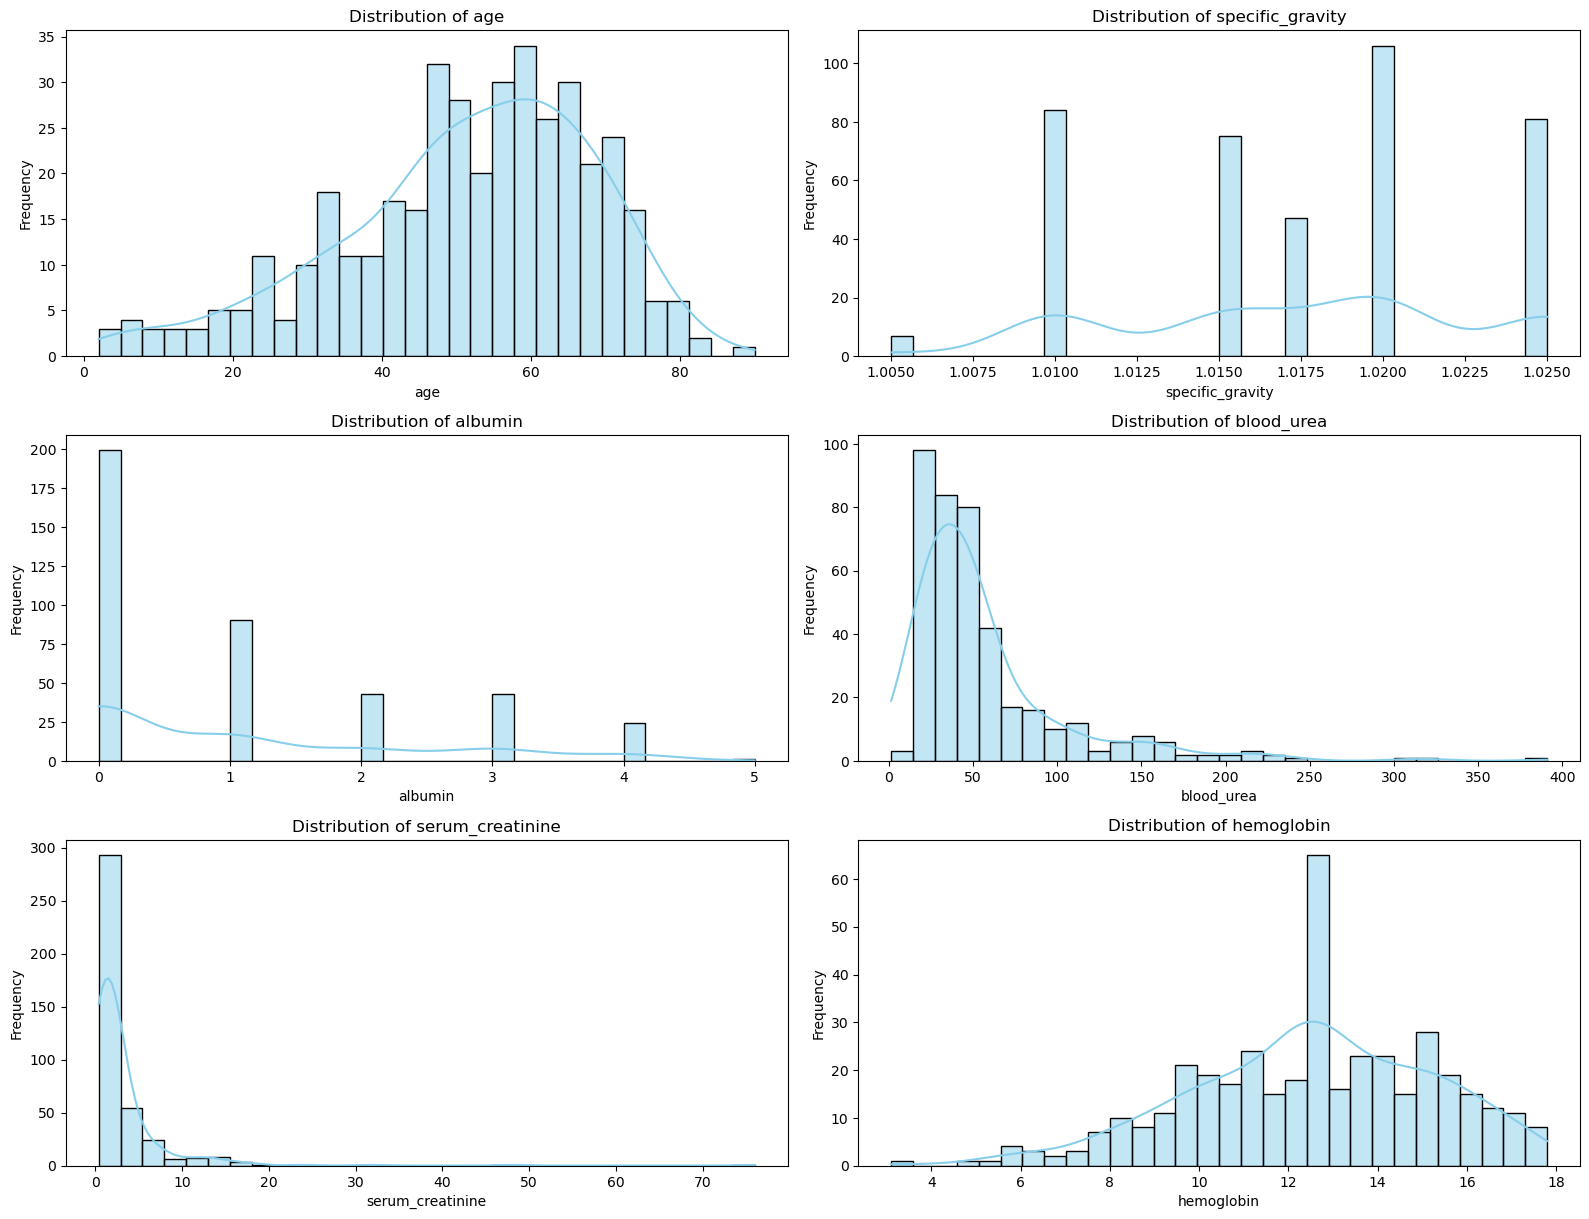

In [45]:
# Set the plot size
plt.figure(figsize=(16, len(numerical_cols) * 4))

# Loop through numerical columns and plot KDE
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
# Remove outliers using IQR for each numerical column

before = df.shape[0]
print(before)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

after = df.shape[0]
print(after)

print(f"Rows removed: {before - after}")

400
319
Rows removed: 81


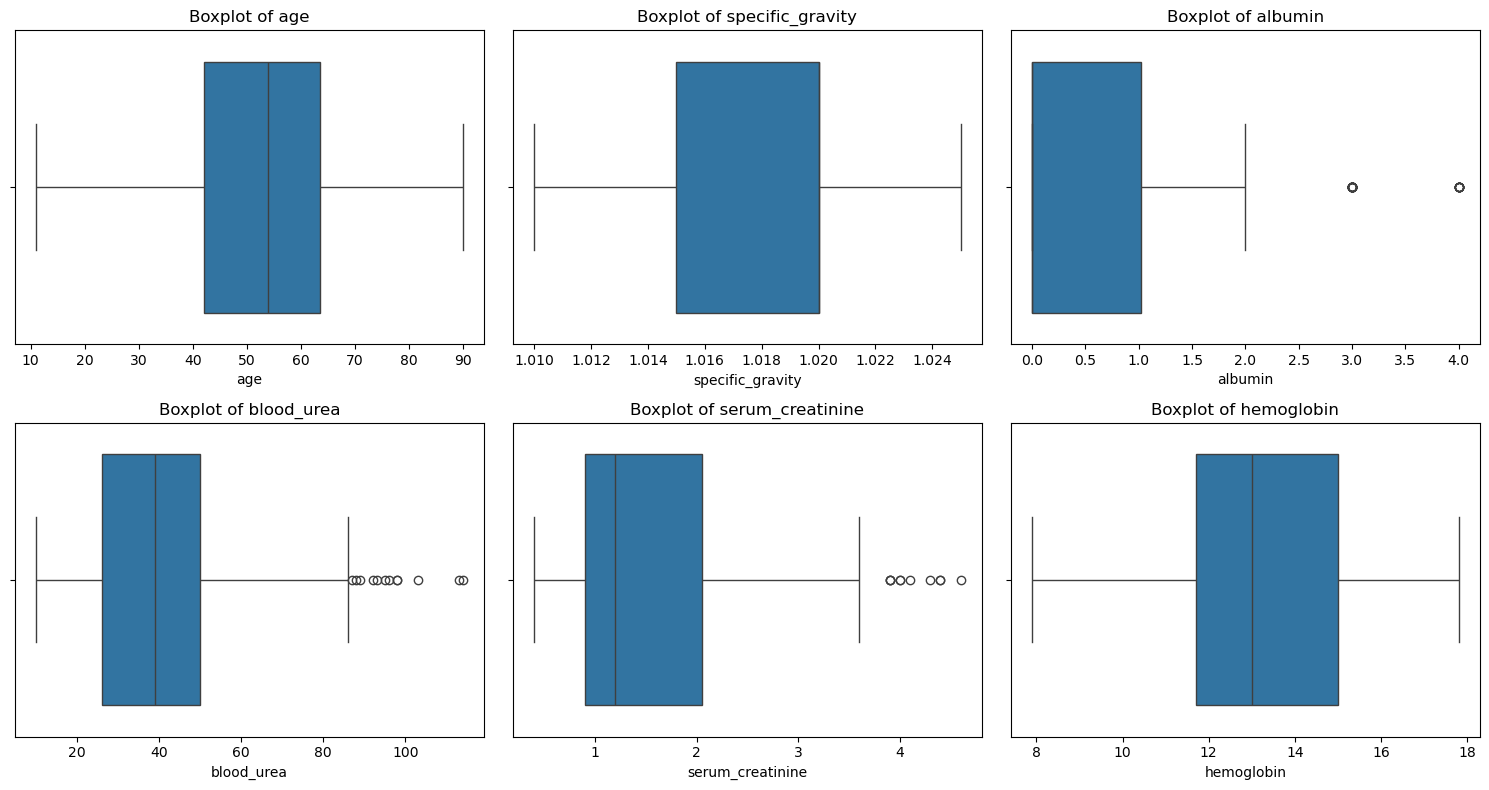

In [47]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

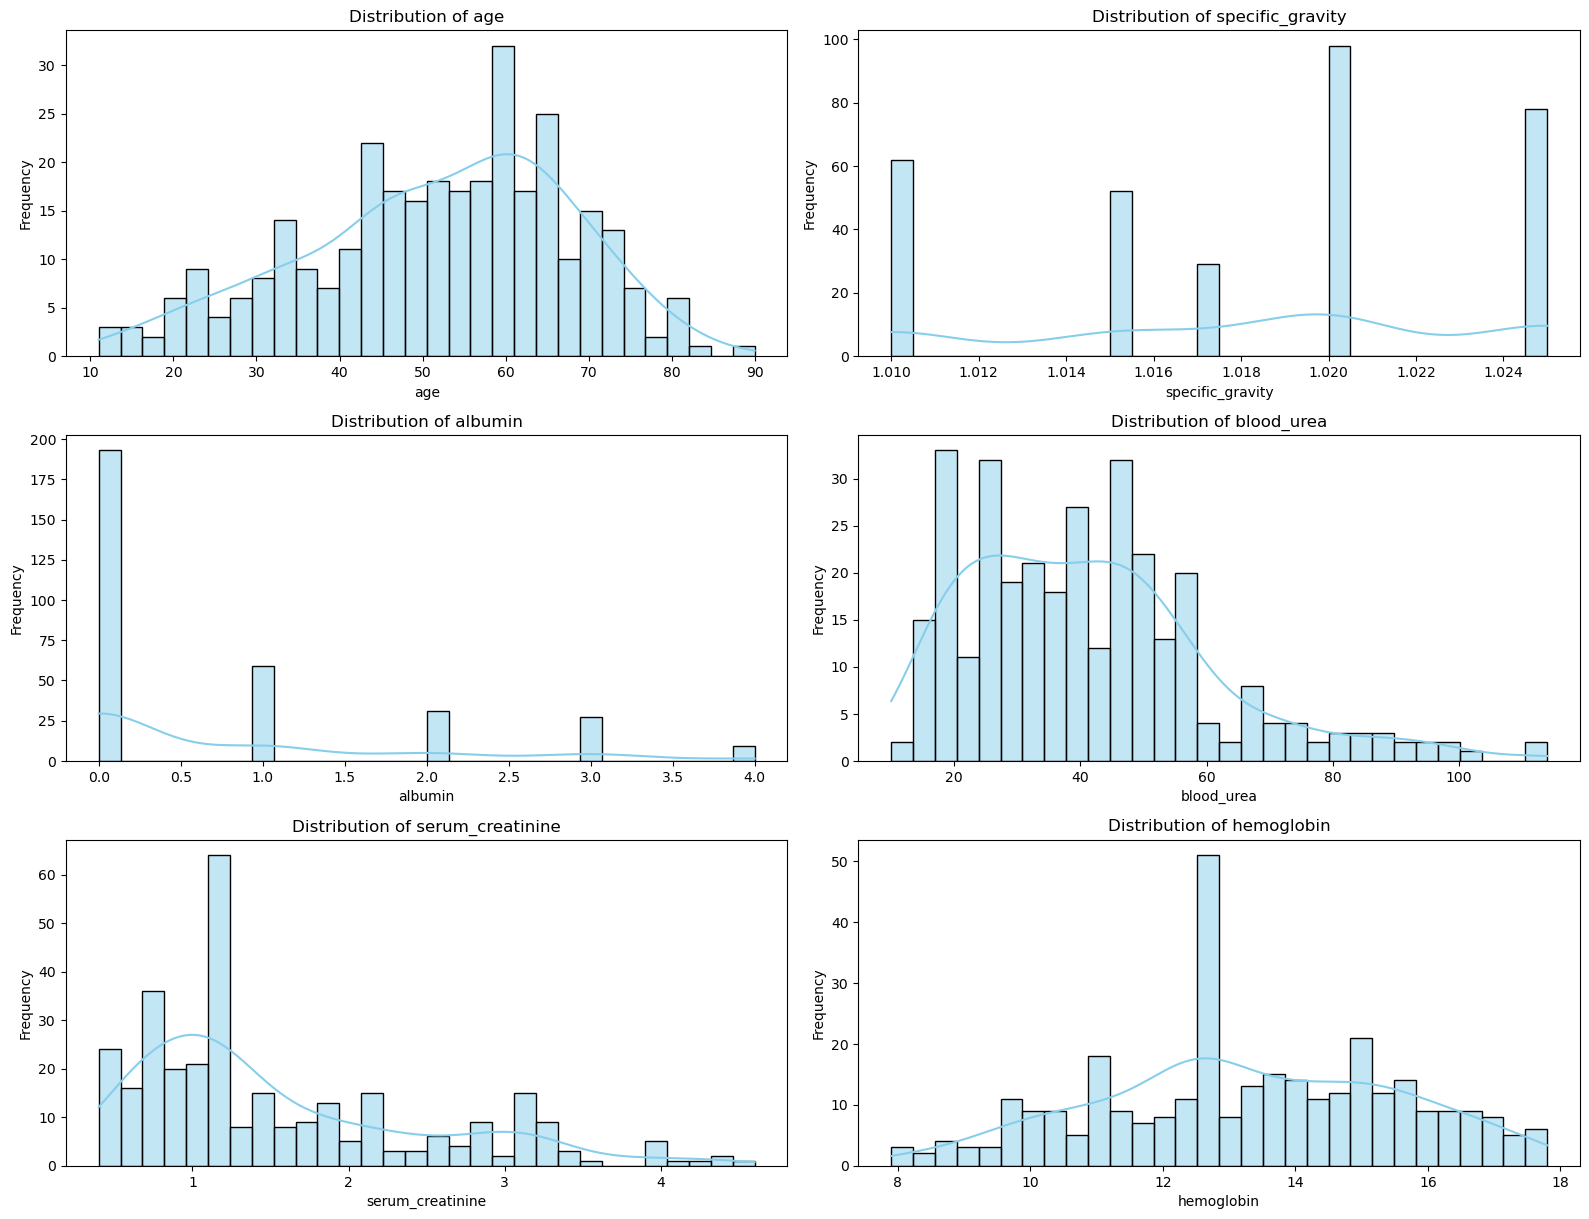

In [48]:
# Set the plot size
plt.figure(figsize=(16, len(numerical_cols) * 4))

# Loop through numerical columns and plot KDE
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [49]:
# Apply log(1 + x) transformation to reduce right skewness and outliers
for col in ['blood_urea', 'serum_creatinine', 'albumin']:
    df[col] = np.log1p(df[col])

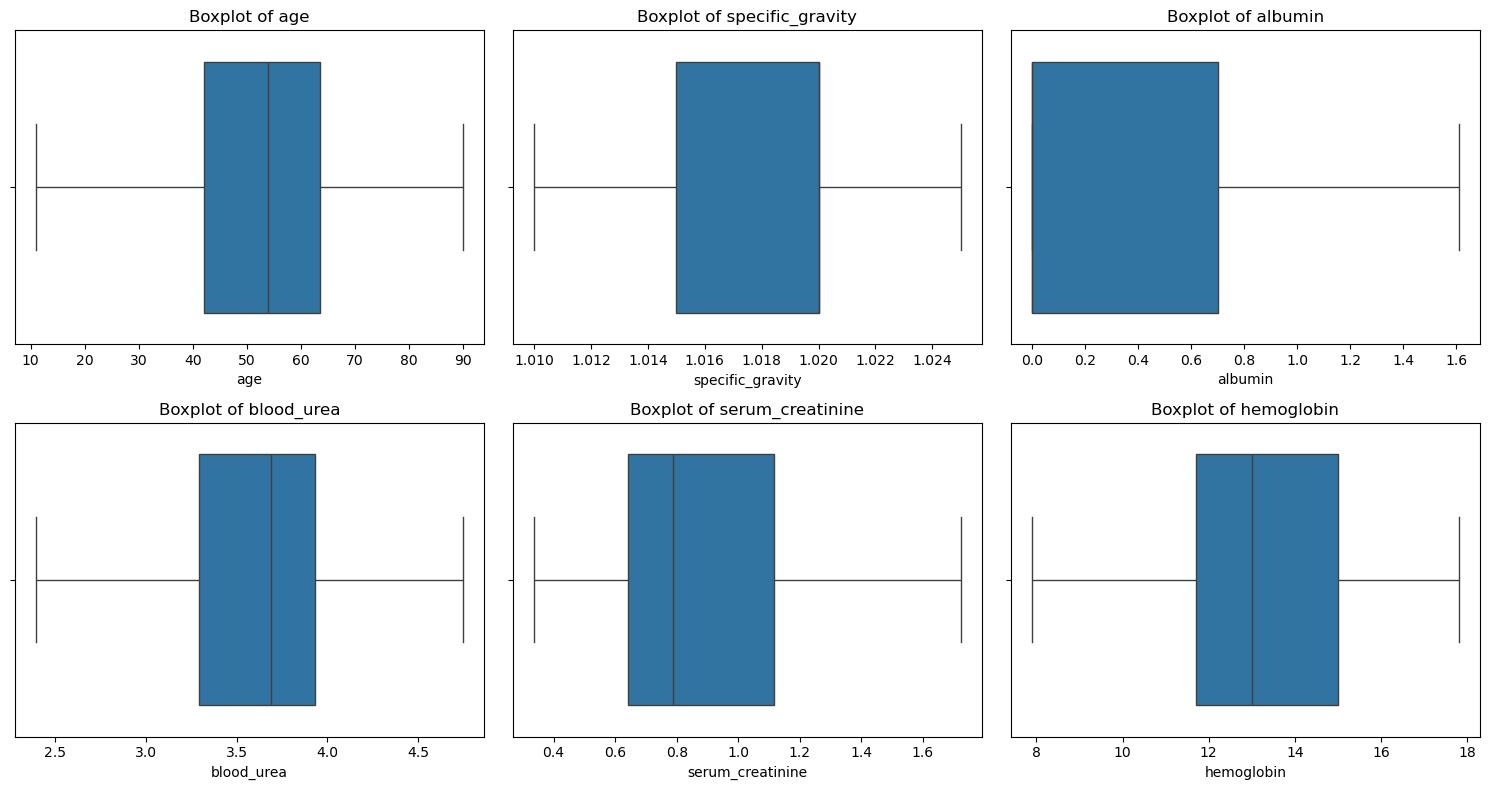

In [50]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

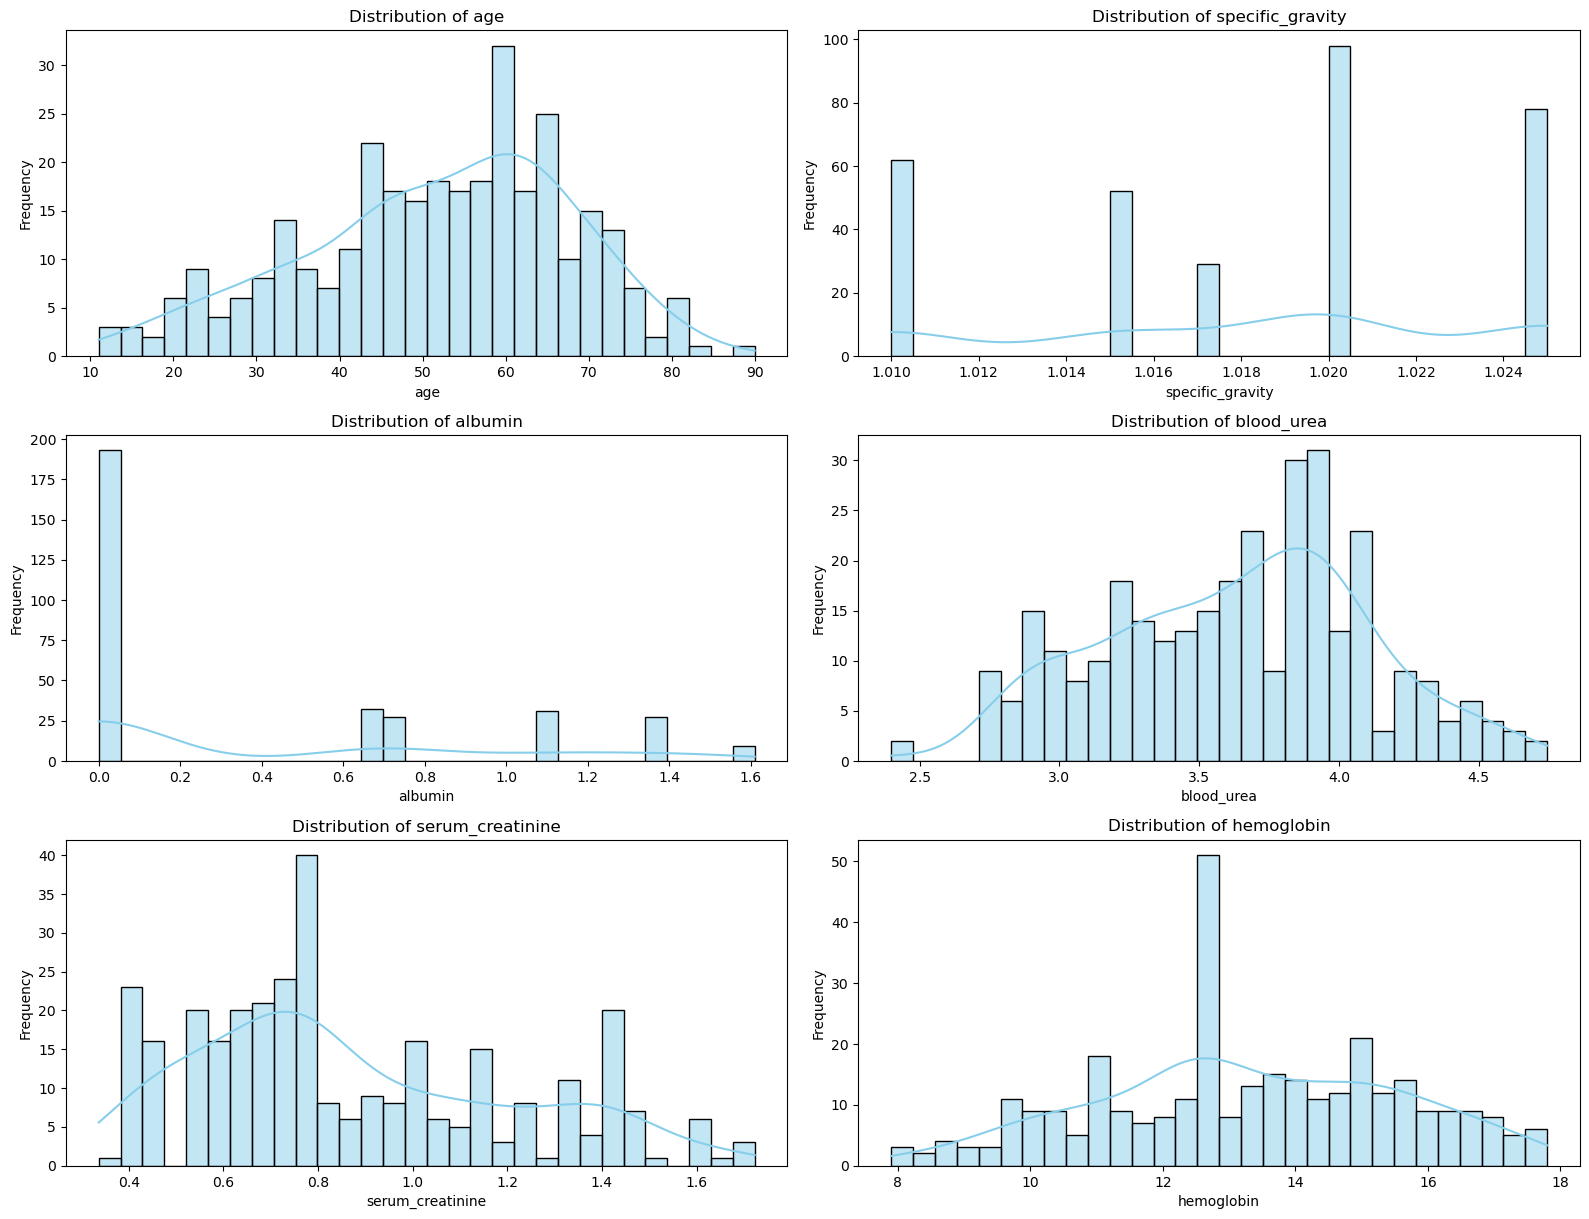

In [51]:
# Set the plot size
plt.figure(figsize=(16, len(numerical_cols) * 4))

# Loop through numerical columns and plot KDE
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

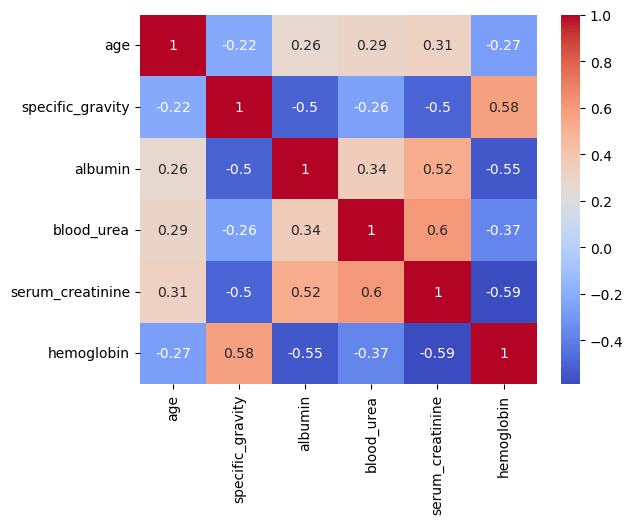

In [52]:
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:
df = df.reset_index(drop=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                319 non-null    float64
 1   specific_gravity   319 non-null    float64
 2   albumin            319 non-null    float64
 3   blood_urea         319 non-null    float64
 4   serum_creatinine   319 non-null    float64
 5   hemoglobin         319 non-null    float64
 6   diabetes_mellitus  319 non-null    object 
 7   hypertension       319 non-null    object 
 8   pus_cell           319 non-null    object 
 9   appetite           319 non-null    object 
 10  target             319 non-null    object 
dtypes: float64(6), object(5)
memory usage: 27.5+ KB


In [55]:
df

,age,specific_gravity,albumin,blood_urea,serum_creatinine,hemoglobin,diabetes_mellitus,hypertension,pus_cell,appetite,target
0,48.0,1.020,0.693147,3.610918,0.788457,15.4,yes,yes,normal,good,ckd
1,62.0,1.010,1.098612,3.988984,1.029619,9.6,yes,no,normal,poor,ckd
2,51.0,1.010,1.098612,3.295837,0.875469,11.6,no,no,normal,good,ckd
3,60.0,1.015,1.386294,3.258097,0.741937,12.2,yes,yes,normal,good,ckd
4,24.0,1.015,1.098612,3.465736,0.741937,12.4,yes,no,abnormal,good,ckd
...,...,...,...,...,...,...,...,...,...,...,...
314,55.0,1.020,0.000000,3.912023,0.405465,15.7,no,no,normal,good,notckd
315,42.0,1.025,0.000000,3.465736,0.788457,16.5,no,no,normal,good,notckd
316,12.0,1.020,0.000000,3.295837,0.470004,15.8,no,no,normal,good,notckd
317,17.0,1.025,0.000000,3.931826,0.693147,14.2,no,no,normal,good,notckd


In [56]:
selected_update = ["hemoglobin", "specific_gravity", "albumin", "serum_creatinine", "hypertension", "diabetes_mellitus", "target" ]

In [57]:
df = df[selected_update]

In [58]:
df

,hemoglobin,specific_gravity,albumin,serum_creatinine,hypertension,diabetes_mellitus,target
0,15.4,1.020,0.693147,0.788457,yes,yes,ckd
1,9.6,1.010,1.098612,1.029619,no,yes,ckd
2,11.6,1.010,1.098612,0.875469,no,no,ckd
3,12.2,1.015,1.386294,0.741937,yes,yes,ckd
4,12.4,1.015,1.098612,0.741937,no,yes,ckd
...,...,...,...,...,...,...,...
314,15.7,1.020,0.000000,0.405465,no,no,notckd
315,16.5,1.025,0.000000,0.788457,no,no,notckd
316,15.8,1.020,0.000000,0.470004,no,no,notckd
317,14.2,1.025,0.000000,0.693147,no,no,notckd


In [97]:
X = df.drop(columns=['target'],axis = 1)
y = df['target']

In [99]:
numerical_cols_update = ["hemoglobin", "specific_gravity", "albumin", "serum_creatinine"]
categorical_cols_update = ["hypertension", "diabetes_mellitus"]

In [143]:
df[numerical_cols_update].isnull().sum()
df[categorical_cols_update].isnull().sum()

hypertension         0
diabetes_mellitus    0
dtype: int64

In [167]:
# Ensure numeric columns are truly numeric
for col in numerical_cols_update:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

# Ensure categorical columns are clean strings
for col in categorical_cols_update:
    df.loc[:, col] = df[col].astype(str)

In [169]:
df[numerical_cols_update].dtypes

hemoglobin          float64
specific_gravity    float64
albumin             float64
serum_creatinine    float64
dtype: object

In [171]:
df[categorical_cols_update].dtypes

hypertension         object
diabetes_mellitus    object
dtype: object

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [207]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_update),
        ('cat', OneHotEncoder(drop='first'), categorical_cols_update)
    ]
)

In [209]:
# Models and their parameter grids for GridSearchCV
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "model__C": [0.1, 1, 10],
            "model__solver": ['liblinear', 'lbfgs']
        }
    },
    "Support Vector Machine": {
        "model": SVC(),
        "params": {
            "model__C": [0.001, 0.01, 0.1],
            "model__kernel": ['linear', 'rbf']
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 9],
            "model__weights": ['uniform', 'distance']
        }
    }
}

In [211]:
for name, mp in models.items():
    print(f"\nTraining {name} with GridSearchCV...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp["model"])
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(pipeline, param_grid=mp["params"], cv=skf, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

    # Training accuracy on the entire training set with best estimator
    y_train_pred = grid.best_estimator_.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Training accuracy for {name}: {train_acc:.4f}")

    # Testing accuracy on test set
    y_pred = grid.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("Test set performance:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"Test accuracy for {name}: {test_acc:.4f}")


Training Logistic Regression with GridSearchCV...
Best parameters for Logistic Regression: {'model__C': 10, 'model__solver': 'liblinear'}
Best cross-validation accuracy: 0.9882
Training accuracy for Logistic Regression: 0.9882
Test set performance:
              precision    recall  f1-score   support

         ckd       1.00      0.95      0.97        37
      notckd       0.93      1.00      0.96        27

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64

Test accuracy for Logistic Regression: 0.9688

Training Support Vector Machine with GridSearchCV...
Best parameters for Support Vector Machine: {'model__C': 0.1, 'model__kernel': 'linear'}
Best cross-validation accuracy: 0.9843
Training accuracy for Support Vector Machine: 0.9843
Test set performance:
              precision    recall  f1-score   support

         ckd       1.00      0.92      0.96        37
      notck

In [213]:
print(Counter(df["hypertension"]))
print(Counter(df["diabetes_mellitus"]))
print(Counter(df["target"]))

Counter({'no': 224, 'yes': 95})
Counter({'no': 227, 'yes': 92})
Counter({'ckd': 169, 'notckd': 150})


In [219]:
grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hemoglobin',
                                                   'specific_gravity',
                                                   'albumin',
                                                   'serum_creatinine']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['hypertension',
                                                   'diabetes_mellitus'])])),
                ('model', KNeighborsClassifier(n_neighbors=7))])

In [221]:
joblib.dump(grid.best_estimator_, "ckd.pkl")
print(f"Saved the best model for {name} as 'ckd.pkl'")

Saved the best model for K-Nearest Neighbors as 'ckd.pkl'
